##Estatística em Python:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scp



In [ ]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sb.__version__)
print('Versão do scipy -> %s' % scp.__version__)

Versão do pandas -> 1.1.5
Versão do numpy -> 1.19.5
Versão do seaborn -> 0.11.2
Versão do scipy -> 1.4.1


### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

##Importando pandas e lendo o dataset do projeto

In [ ]:
dados = pd.read_csv("dados.csv")

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
sorted(dados['Anos de Estudo'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 nan]

In [ ]:
#Descobrindo os pontos mais altos e mais baixos
print(dados['Idade'].min())
dados['Idade'].max()

13.0


99.0

In [ ]:
#Distribuição de variáveis:
dados['Sexo'].value_counts()

0.0    82124
1.0    36258
Name: Sexo, dtype: int64

In [ ]:
#Para uma compreensão percentual mais apurada:
dados['Sexo'].value_counts(normalize = True)

#69% são homens e 30% são mulheres.

0.0    0.69372
1.0    0.30628
Name: Sexo, dtype: float64

In [ ]:
#De uma forma mais adequada:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100

dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [ ]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0.0,82124,69.372033
1.0,36258,30.627967


In [ ]:
#Renomeando o Index para os sexos e a coluna do index:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)

dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,82124,69.372033
Feminino,36258,30.627967


In [ ]:
#Entendendo distribuição cruzada:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)

frequencia.rename(index= sexo, inplace=True)
frequencia.rename(columns= cor, inplace= True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,325,38349,7996,429,35025
Feminino,141,16640,4212,196,15069


In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize= True)

percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace= True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.002745,0.323943,0.067544,0.003624,0.295864
Feminino,0.001191,0.140562,0.035580,0.001656,0.127291


In [ ]:
#Observado o cruzamento entre variáveis:
#Os valores obtidos correspondem à renda de cada etnia e sexo do dataframe
percentual = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= "mean", values = dados.Renda)

percentual.rename(index= sexo, inplace=True)
percentual.rename(columns= cor, inplace= True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1191.138462,3032.73191,1704.096423,4801.668998,1766.989493
Feminino,3173.581560,2163.83768,1197.079772,3356.989796,1230.091512


#Variáveis quantitativas

In [ ]:
dados.Renda.min()

0.0

In [ ]:
dados.Renda.max()

200000.0

In [ ]:
classes = [0, 1576, 3152, 7880, 15770, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
#Criar agora a relação entre as classes economicas e as classificações das rendas:
pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True).head()

0    E
1    E
2    E
3    C
4    E
Name: Renda, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
#em uma forma mais palatável:
frequencia = pd.value_counts(pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True))
frequencia

E    72470
D    28304
C    12765
B     3771
A     1072
Name: Renda, dtype: int64

In [ ]:
#Em percentual:
percentual = pd.value_counts(pd.cut(x= dados.Renda, bins = classes, labels=labels, include_lowest=True), normalize = True)
percentual

E    0.612171
D    0.239090
C    0.107829
B    0.031855
A    0.009055
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas

,Frequência,Porcentagem (%)
E,72470,0.612171
D,28304,0.239090
C,12765,0.107829
B,3771,0.031855
A,1072,0.009055


In [ ]:
#Invertendo a ordem de amostragem:
dist_freq_quantitativas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,1072,0.009055
B,3771,0.031855
C,12765,0.107829
D,28304,0.239090
E,72470,0.612171


#Trabalhando com Histogramas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


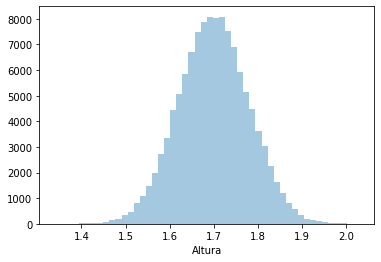

In [ ]:
ax = sns.distplot(dados.Altura, kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


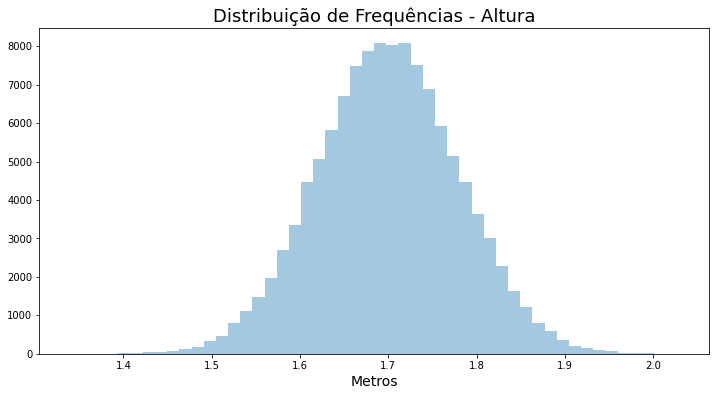

In [ ]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


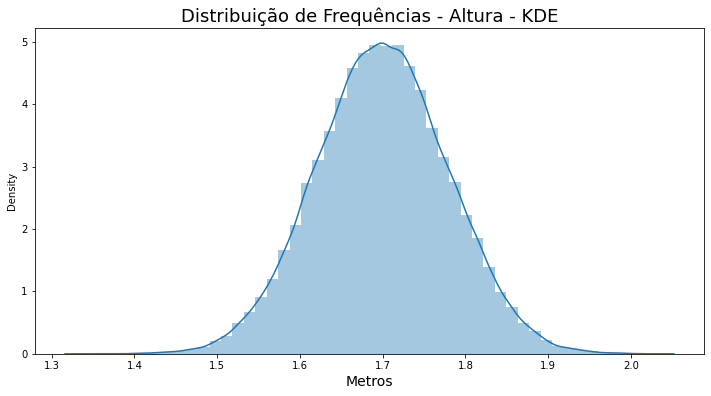

In [ ]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

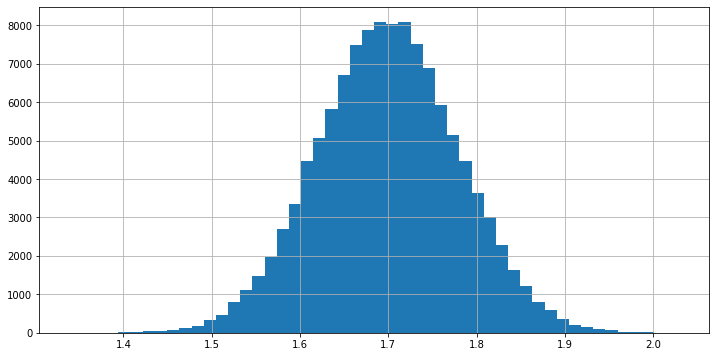

In [ ]:
dados.Altura.hist(bins = 50, figsize=(12,6))